**Evolution of a Sandy Coastline**

**1. Introduction**

**Motivation and Theme**

The main focus of this study is the evolution of a sandy coastline as a function of alongshore sediment transport. We want to model this because this process is a complex and dynamic system that is constantly affected by both natural (wind, waves, rising sea levels) and anthropogenic (coastal buildings, dredging) forces.

**Why is this important?**

This is important because coastal areas are typically highly developed, with 40% of the United States population alone living within a coastal county (National Oceanic and Atmospheric Administration, 2024). This means that these areas are highly susceptible to natural coastal hazards such as erosion and flooding. As coastlines change over time, accurate modeling and forecasting of these changes is imperative to protect development and livelihood.

**Methods Used**

We will utilize a simplified, one-line model to represent the changing coastline. This model functions on the assumption that the 3D profile of the sand on the beach (from crest to depth) moves shoreward or seaward without changing its shape. Therefore, we can represent the entire system by tracking the movement of a single contour line, the shoreline. This process is governed by alongshore sediment transport and ignores cross-shore transport of mass (movement perpendicular to the coast). By combining the principle of mass conservation of sediment (or the Continuity Equation) with the simplified relationship for alongshore transport rate (Q), we create a closed system that utilizes the One-Dimensional Diffusion Equation.

**Other Models**

We are using the One-Line Diffusion Model as it is very effective for large-scale and long-term analysis, however there are better equipped, more complex models as well. Some scientists modeling the evolution of a sandy coastline may utilize multi-line models. These account for both the along-shore and cross-shore movement of sediment. Because they model multiple directions of movement, it is possible to also model the changes in shape of the shoreline. One example of these models include the SBEACH model (Community Surface Dynamics Modeling System, 2020). There are also process-based 3D models available that are much more computationally complex. Some examples of these include DELft3D and XBeach, which also utilize coupled equations for water flow, wave propagation, and sediment transport in three directions (XBeach Manual, 2023). These models are used for more short-term analyses of specific coastal properties and structures, for example analyzing the impact of a storm.

Equations (10 pts)
What are the fundamental physical/chemical/etc processes?
Include the relevant equations and potentially where they come from (i.e. how are they derived)
Describe all terms, variables, parameters, boundary conditions and initial conditions
Describe any assumptions being made

**2. Equations**

**Fundamental Processes**

The fundamental process governing our model is Conservation of Mass. The rate of change of the volume of sand within a specific section of coastline must be equal to the difference between the alongshore sediment transport rate flowing in and flowing out of the coastline section.

**Governing Equation**

**A. Continuity Equation**

This equation relates the change in shoreline position ($\partial y / \partial t$) to the alongshore change in sediment transport ($\partial Q / \partial x$).

$$\frac{\partial y}{\partial t} = - \frac{1}{D} \frac{\partial Q}{\partial x}$$

This shows that the change in the sediment volume is proportional to the change in the shoreline position scaled by a constant depth of the sand. Since the right hand side of the equation is negative, it shows that a decrease in transport rate alongside the coast ($\partial Q / \partial x < 0$) causes accretion along the coastline ($\partial y / \partial t > 0$).

**B. Transport Equation**

This equation shows that the alongshore transport rate, Q, is proportional to the local alongshore slope of the shoreline.

$$Q = -K \frac{\partial y}{\partial x}$$

Here, K is a transport coefficient measured in m^2/s, meant to represent the wave enegy flux and sediment characteristics.

**C. Governing Partial Differential Equation**

We substitute the Transport Equation (B) into the Continuity Equation (A) in order to close the system. This results in the One-dimensional Diffusion Equation:

$$\frac{\partial y}{\partial t} = \frac{K}{D} \frac{\partial^2 y}{\partial x^2}$$

We can define a diffusion coefficient, $\alpha = K/D$. this controls the rate of diffusion or smoothing of the coastline.

**Terms, Variables, and Parameters**

y(x,t) is the cross-shore position of the shoreline (m)

x is the along-shore distance (m)

t is the time (s)

K is the empirical transport coefficient (related to wave energy) (m^2/yr)

D is the effective depth of closure

$\alpha$ is the speed of shoreline diffusion (m^2/yr)


**Boundary Conditions and Initial Conditions**

Initial Condition: y(x,0)

This represents the initial shape of the coastline. We will use a sine wave perturbation.

Boundary Condition 1: y(0,t) = 0

This is a Dirichlet boundary representing the fixed shoreline position, such as a jetty at x=0.

Boundary Condition 2: $\frac{\partial y}{\partial x}(L, t) = 0$

This is a Neumann boundary representing that there is zero-flux. This assumes that the shoreline is flat at the far reaches, meaning sand can flow both in and out equally.

**Assumptions**

To make this one-dimensional diffusion model, multiple simplifying assumptions were made about the beach environment and processes invloved in changing the shape of the shoreline. The first major assumption is that the shape of the beach, from the top of the sand to its depth of closure, remains constant even as the shoreline moves. We make this assumption so that we may function in one dimension rather than three dimensions. Next, we are assuming that the alongshore sediment transport (Q) is the only process causing an impactful shoreline change. We are ignoring cross-shore transport, or movement perpendicular to the coast. We are also assuming that the paramters K (transport coefficient) and D (depth of closure) are constant in both the space and time dimensions. Finally, we make the assumption that this coastline has no other internal sources, such as a river depositing sand, or sinks, such as dune building. This allows us to treat the system as purely conservation of mass.

**3. Numerical Methods**

Crank Nicolson Method
*   Uses the trapezoidal method
*   First solve a nonlinear system of equations - creates a matrix problem and then solves the inversion
*   Combines both Forward Euler and Backward Euler
*   This allows the solution to stay stable, even when the time is large
*   An accurate and reliable method
*   Good in mass transfer problems and conservation of mass transfer - good for this current problem where sand is being transported along a shoreline

Boundary Conditions:


*   Neumann Boundary Conditions: no specific values at the boundaires - shows what is happening at the boundaries instead of setting them at fixed values - this can show how a shoreline evolves
*   Dirchelet: sets the boundaries at a specific value - can show how the rest of the shoreline reacts when there is no shoreline evolution




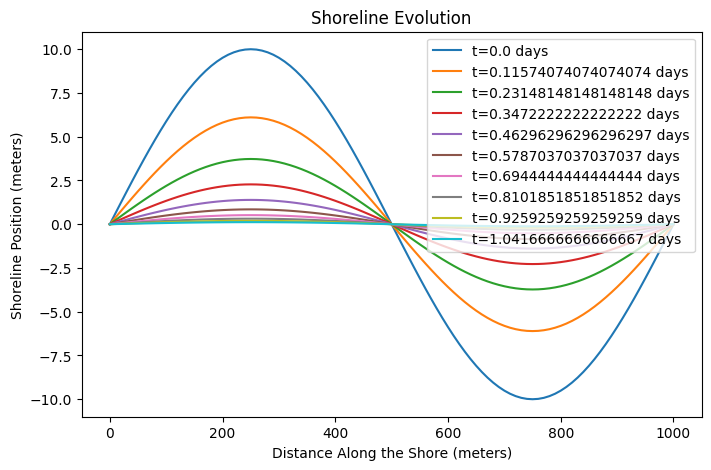

In [1]:
#SCENARIO: Crank-Nicolson, Dirchelet Boundaries, Diffusion Coefficient = > 1, Over 1 Day

#Import Packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

#Known Variables
K = 10      #transport coefficient (m/s^2)
D = 8       #depth (m)
alpha = K/D #diffusivity m/s
L = 1000    #length of shoreline
dx = 10     #spatial step (m)
dt = 1      #time step (s)
tf = 100000 #total time (s)

nx = int(L/dx) + 1 #Number of grid point
nt = int(tf/dt) #Number of time steps

x = np.linspace(0, L, nx) #Create array of x positions from 0 to L

#Crank–Nicolson coefficient
C = alpha * dt / (2 * dx**2)

#Initial conditions
y_old = np.zeros(nx) #Starting with zero
y_old = 10*np.sin(2*np.pi*x/L) #Apply given equation
y_all = np.zeros((nx, nt)) #Storage for shoreline positions

#Boundary conditions
bc_left = 0
bc_right = 0

#Create Matrices - tridiagonal matrices
diags = np.array([-1, 0, 1])

#Building matrix for left hand side
M1_data = np.array([-C*np.ones(nx),(1+2*C)*np.ones(nx), -C*np.ones(nx)])
M1 = spdiags(M1_data, diags, nx, nx).toarray()

#Building matrix for right hand side
M2_data = np.array([C*np.ones(nx),(1-2*C)*np.ones(nx), C*np.ones(nx)])
M2 = spdiags(M2_data, diags, nx, nx).toarray()

#Apply boundary conditions to matrices
M1[0,0] = 1
M1[0,1] = 0
M1[-1,-1] = 1
M1[-1,-2] = 0

M2[0,0] = 1
M2[0,1] = 0
M2[-1,-1] = 1
M2[-1,-2] = 0

#Creating the loop
for n in range(nt):

  #Right side
  b = np.matmul(M2, y_old)

  #Boundary conditions
  b[0] = bc_left
  b[-1] = bc_right

  #Solve the linear system
  y_new = np.linalg.solve(M1, b)

  #Update solution
  y_old = y_new.copy()
  y_all[:, n] = y_old

#Create the figure and plot
plt.figure(figsize=(8,5))
for n in range(0, nt, nt//10):
  time = (n*dt)/86400
  plt.plot(x, y_all[:, n], label=f"t={(time)} days")


plt.xlabel('Distance Along the Shore (meters)')
plt.ylabel('Shoreline Position (meters)')
plt.title('Shoreline Evolution')
plt.legend()
plt.show()

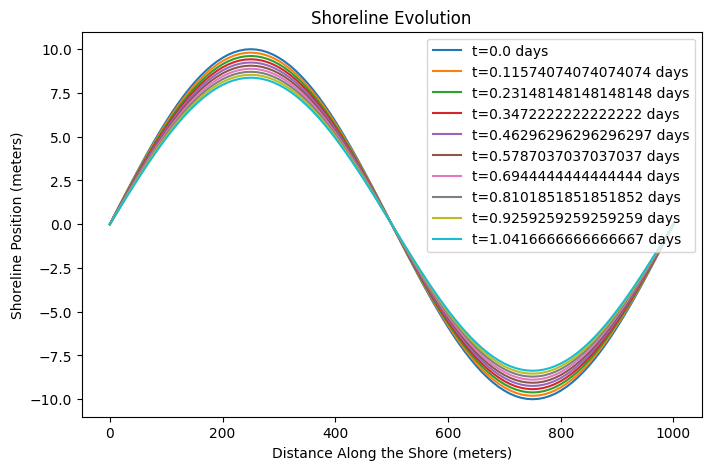

In [2]:
#SCENARIO: Crank-Nicolson, Dirchelet Boundaries, Diffusion Coefficient = < 1, Over 1 Day


#Import Packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

#Known Variables
D = 8        #depth (m)
alpha = 0.05 #diffusivity (m^2/s)
L = 1000     #length of the shoreline
dx = 10      #spatial step (m)
dt = 1       #time step (s)
tf = 100000  #total time

nx = int(L/dx) + 1 #number of grid point
nt = int(tf/dt) #number of time steps

x = np.linspace(0, L, nx) #Create space for x (0-L)

#Crank–Nicolson coefficient
C = alpha * dt / (2 * dx**2)

#Initial and boundary conditions
y_old = np.zeros(nx) #Starting with zero
y_old = 10*np.sin(2*np.pi*x/L) #Apply given equation
y_all = np.zeros((nx, nt))  #Storage for shoreline positions

#Boundary conditions
bc_left = 0
bc_right = 0

#Create Matrices - tridiagonal matrices
diags = np.array([-1, 0, 1])

#Building matrix for left hand side
M1_data = np.array([-C*np.ones(nx),(1+2*C)*np.ones(nx), -C*np.ones(nx)])
M1 = spdiags(M1_data, diags, nx, nx).toarray()

#Building matrix for right hand side
M2_data = np.array([C*np.ones(nx),(1-2*C)*np.ones(nx), C*np.ones(nx)])
M2 = spdiags(M2_data, diags, nx, nx).toarray()

#Apply boundary conditions to matrices
M1[0,0] = 1
M1[0,1] = 0
M1[-1,-1] = 1
M1[-1,-2] = 0

M2[0,0] = 1
M2[0,1] = 0
M2[-1,-1] = 1
M2[-1,-2] = 0

#Creating the loop
for n in range(nt):

  #Right side
  b = np.matmul(M2, y_old)

  #Boundary conditions
  b[0] = bc_left
  b[-1] = bc_right

  #Solve the linear system
  y_new = np.linalg.solve(M1, b)

  #Update solution
  y_old = y_new.copy()
  y_all[:, n] = y_old

#Create the figure and plot
plt.figure(figsize=(8,5))
for n in range(0, nt, nt//10):
  time = (n*dt)/86400
  plt.plot(x, y_all[:, n], label=f"t={(time)} days")


plt.xlabel('Distance Along the Shore (meters)')
plt.ylabel('Shoreline Position (meters)')
plt.title('Shoreline Evolution')
plt.legend()
plt.show()

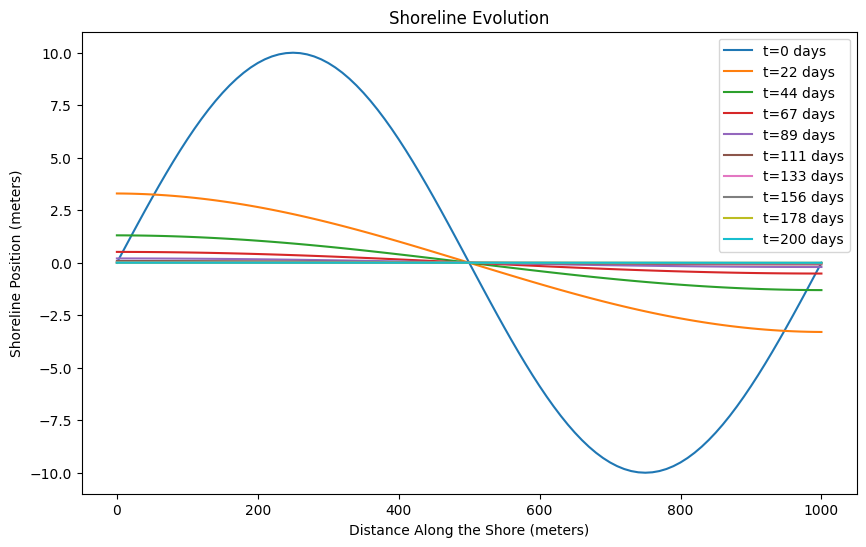

In [3]:
#SCENARIO: Crank-Nicolson, Neumann Boundaries, Diffusion Coefficient = < 1, Over 200 Days

#Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

#Known Variables
alpha = 0.05       #diffusivity (m^2/s)
L = 1000           #coastline length (m)
dx = 10            #spatial step (m)
dt = 3600          #time step (s)
tf = 3600*24*200   #total simulation time (s)


#Grid and time setup
nx = int(L/dx) + 1         #number of spatial points
nt = int(tf/dt)            #number of time steps
x = np.linspace(0, L, nx)  #spatial grid

#Crank–Nicolson coefficient
C = alpha * dt / (2*dx**2)


#Initial condition
y_old = 10*np.sin(2*np.pi*x/L)  #initial shoreline
y_all = np.zeros((nx, nt))      #store results
y_all[:,0] = y_old.copy()


#Construct matrices using diags

#Left side
A = (np.diag([1 + 2*C]*nx, 0) + np.diag([-C]*(nx-1), -1) + np.diag([-C]*(nx-1), 1))

#Right side
B = (np.diag([1 - 2*C]*nx, 0) + np.diag([C]*(nx-1), -1) + np.diag([C]*(nx-1), 1))


#Neumann boundary conditions

#Left boundary
A[0,0] = 1 + C
A[0,1] = -C
A[-1,-1] = 1 + C
A[-1,-2] = -C

#Right boundary
B[0,0] = 1 - C
B[0,1] = C
B[-1,-1] = 1 - C
B[-1,-2] = C


#Creating the loop
for n in range(1, nt):
    b = np.matmul(B, y_old)
    y_new = np.linalg.solve(A, b)
    y_old = y_new.copy()
    y_all[:, n] = y_old

#Plotting
plt.figure(figsize=(10,6))
days = np.linspace(0, nt-1, 10, dtype=int)
for n in days:
    time_days = n*dt / 86400  #seconds to days
    plt.plot(x, y_all[:, n], label=f't={time_days:.0f} days')

plt.xlabel('Distance Along the Shore (meters)')
plt.ylabel('Shoreline Position (meters)')
plt.title('Shoreline Evolution')
plt.legend()
plt.show()

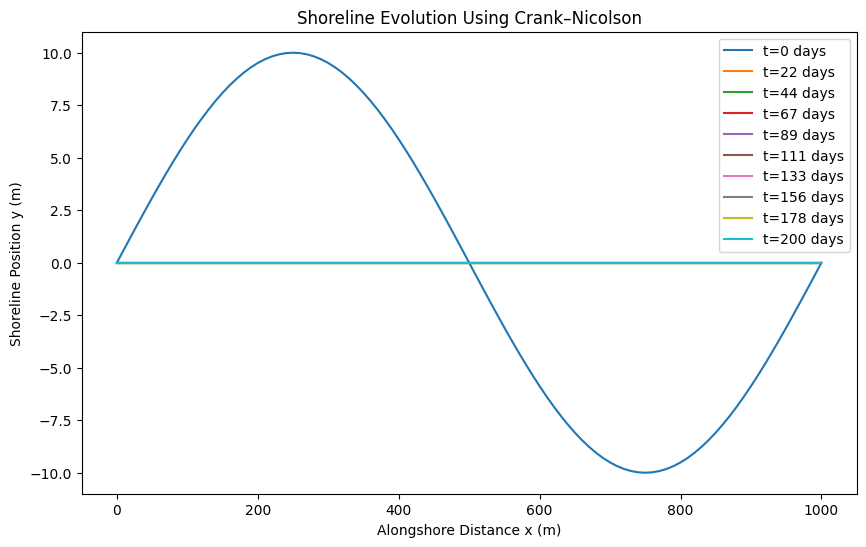

In [4]:
#SCENARIO: Crank-Nicolson, Neumann Boundaries, Diffusion Coefficient = 1, Over 200 Days

#Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

#Known Variables
alpha = 1          #diffusivity (m^2/s)
L = 1000           #coastline length (m)
dx = 10            #spatial step (m)
dt = 3600          #time step (s)
tf = 3600*24*200   #total simulation time (s)


#Grid and time setup
nx = int(L/dx) + 1         #number of spatial points
nt = int(tf/dt)            #number of time steps
x = np.linspace(0, L, nx)  #spatial grid

#Crank–Nicolson coefficient
C = alpha * dt / (2*dx**2)


#Initial condition
y_old = 10*np.sin(2*np.pi*x/L)  #initial shoreline
y_all = np.zeros((nx, nt))      #store results
y_all[:,0] = y_old.copy()


#Create matrices

#Left side
A = (np.diag([1 + 2*C]*nx, 0) + np.diag([-C]*(nx-1), -1) + np.diag([-C]*(nx-1), 1))

#Right side
B = (np.diag([1 - 2*C]*nx, 0) + np.diag([C]*(nx-1), -1) + np.diag([C]*(nx-1), 1))


#Neumann boundary conditions

#Left boundary
A[0,0] = 1 + C
A[0,1] = -C
A[-1,-1] = 1 + C
A[-1,-2] = -C


#Right boundary
B[0,0] = 1 - C
B[0,1] = C
B[-1,-1] = 1 - C
B[-1,-2] = C


#Creating the loop
for n in range(1, nt):
    b = np.matmul(B, y_old)
    y_new = np.linalg.solve(A, b)
    y_old = y_new.copy()
    y_all[:, n] = y_old

#Plotting
plt.figure(figsize=(10,6))
days = np.linspace(0, nt-1, 10, dtype=int)
for n in days:
    time_days = n*dt / 86400  #seconds to days
    plt.plot(x, y_all[:, n], label=f't={time_days:.0f} days')

plt.xlabel('Distance Along the Shore (meters)')
plt.ylabel('Shoreline Position (meters)')
plt.title('Shoreline Evolution')
plt.legend()
plt.show()

**4. Results**

Describe the Results:



1.   As diffusivity nears 1, the process of the shoreline evolution speeds up, and the sine waves go from highly oscillating shorelines, to flat, smooth shorelines rapidly - attenuation occurs quickly
2.   As diffusivity nears 0, the process of the shoreline evolution slows down, and the oscillations go decrease at a slower pace - more variation over the given amount of days - attenuation occurs more slowly
3.  Physically, this means that nature naturally works to smooth anomalies in the coastlines. In areas where shoreline "bulges", or has positive curvatur erosion will occur.
4.   In areas where the shoreline has a negative curvature, accretion will occur.
5.   With Dirchelet boundary conditions, the shoreline cannot change at the boundaries - more sand is being transported between the boundaries
6.  With Neumann boundary conditions, there is a lot more variations at the boundaries - the boundaries can transport sand



Comparison of results to known solutions or observations/data:



1.   While the main source and basis for this project, Slingerland & Kump (n.d.), did not provide expected results for this issue, these results make physical sense in the context of conservation of mass
2.  The shoreline will naturally do its best to maintain its shape and conserve its volume, in which we see in everyday life at beaches all around the world.




Changing of results with different model parameters:



1.   Diffusivity:

*   Diffusivity >= 1: attentuation occurs rapidly
*   Diffusivity < 1: attenuation occurs at a more gradual pace

2.   Boundaries

*   Dirchelet: no sand is being transported at the boundaries - attenuation occurs within the boundaries
*   Neumann: sand is being transported at the boundaries - attenuation occurs at and within the boundaries
*   The different boundaries causes different shapes and models of attenuation, based on if the attenuation happens at the boundaries or not

3.  Number of Days


*   The number of days in each scenario did not have an affect on the produced results: both 1 day and 200 days of attenuation both procuded sinusoidal waves along 1,000 meters







What the model tells about shoreline evolution:



1.   The rate of diffusion plays a large role in how fast a shoreline will work to maintain its shape and conserve its volume - faster rates of diffusion lead to shorelines smoothing out more rapidly
2.   Shorelines will internally work to maintain their natural shapes and the shorelines will redistrubte sand as much as possible to bring the shoreline back to its smooth baseline (an even coastline) as time goes on




Possible Improvements:

While this simplified model makes physical sense, there are a few methods in which it could be improved. The largest limitation of our model is that it functions on a one-line assumption. While this makes a complex system simpler to model, it is not realistic. In the real world, there are hundreds of factors affecting the shape of coastlines every day that have to do with perpendicular movement. These include factors such as storms and even river banks that empty along the coast. By including these factors, we would have a much more realistic model and picture of the coastline. Another change we could make is to make the wave energy a function of time. In the real world, wave energy is not fixed and varies seasonally. By accounting for this, we would be able to better model shoreline shape throughout different seasons.


**5. Figures** (See above in Numerical Methods section)

**6. Video Walkthrough**

https://youtu.be/P49dq8fi_OI

**7. References**

Crank-Nicolson Method - An Overview | Sciencedirect Topics, www.sciencedirect.com/topics/mathematics/crank-nicolson-method. Accessed 5 Dec. 2025.


Community Surface Dynamics Modeling System. (2020, September 16). Model:SBEACH. CSDMS. https://csdms.colorado.edu/wiki/Model:SBEACH


National Oceanic and Atmospheric Administration. (2024, June 16). What percentage of the American population lives near the coast? NOAA’s National Ocean Service. https://oceanservice.noaa.gov/facts/population.html  


Slingerland, R., & Kump, L. (n.d.). One-Dimensional Diffusion Problems. In Mathematical Modeling of Earth’s Dynamical Systems. Princeton University Press.


XBeach Manual. (2023, June 27). https://xbeach.readthedocs.io/en/latest/

Work Division:

Tori:


*   Introduction
*   Methods and Equations



Elianna:


*   Numerical Methods (explanation)
*   Numerical Methods (code)

Both:


*   Results and analysis




